# **Import the necessary libraries**



*   Import numpy and pandas as they are essential
*   Import StandardScalar and train_test_split



*   Import the necessary algorithms from sklearn as well
*   Classification and Regression Algorithms used:

    1. DecisionTree
    2. Random Forest
    3. Gradient Boost Classifier
    4. Logistic Regression
    5. Support Vector Machine

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  classification_report

from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings

# **Upload the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Converting the file into a dataframe**

In [3]:
Df = pd.read_csv("/content/drive/MyDrive/Mini_Project/Dataset_spine.csv")
Df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [4]:
Df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


## ***Data is clean except for Class_att which is the target value***

In [5]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [6]:
Df["Class_att"].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [7]:
Df["Class_att"].replace({'Abnormal' : 1 , 'Normal':0},inplace=True)
Df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,0


# **Visualisation of Data**

<Axes: >

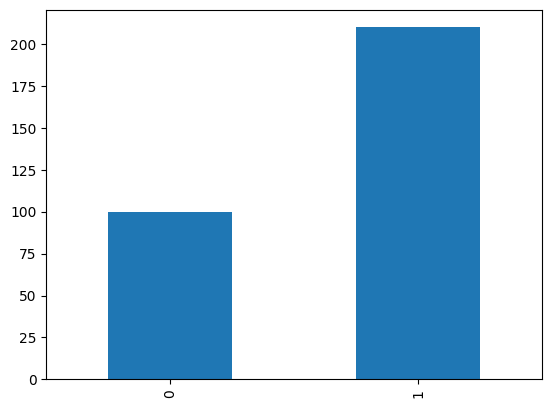

In [8]:
Df["Class_att"].value_counts().sort_index().plot.bar()

In [9]:


sns.set(style="ticks", color_codes=True)
sns.pairplot(Df)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# **Preprocessing**

In [10]:
Df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

In [11]:
Df=Df.drop(Df[Df['degree_spondylolisthesis']>400].index,axis=0)
Df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,0


In [12]:
Y = Df.iloc[:,-1]
X = Df.iloc[:,0:-1]

In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: Class_att, Length: 309, dtype: int64

In [14]:
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

In [16]:
X_train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
238,69.004913,13.291790,55.570143,55.713123,126.611621,10.832011,0.385073,35.4534,7.4752,7.76405,-11.716465,13.0886
241,51.529358,13.517847,35.000000,38.011510,126.718516,13.928331,0.863545,33.2628,11.0870,12.42093,-15.259539,18.2936
24,36.125683,22.758753,29.000000,13.366931,115.577116,-3.237562,0.126474,25.6206,15.7438,11.55610,-18.108941,24.1151
114,80.988074,36.843172,86.960602,44.144903,141.088149,85.872152,0.496181,27.5223,13.5136,11.60893,-13.600284,34.3656
289,44.430701,14.174264,32.243495,30.256437,131.717613,-3.604255,0.126792,15.1269,7.9912,12.23055,-26.340144,32.3929
...,...,...,...,...,...,...,...,...,...,...,...,...
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0.537574,33.0601,7.8080,11.37660,-5.202362,33.2503
67,75.649731,19.339799,64.148685,56.309932,95.903629,69.551303,0.687092,24.1004,13.3444,15.75602,-0.550516,18.2915
25,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205,0.928688,14.6686,13.5700,16.12951,-17.630363,28.1902
197,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,0.751482,12.6576,15.9381,15.23920,-15.444826,7.2157


In [17]:
y_train

238    0
241    0
24     1
114    1
289    0
      ..
212    0
67     1
25     1
197    1
176    1
Name: Class_att, Length: 231, dtype: int64

**Hyper Parameter Selection Test**

In [18]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# best_random_state = None
# best_accuracy = 0.0

# for random_state in range(100):  # Iterate over different random states
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
#     from sklearn.preprocessing import StandardScaler
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.fit_transform(X_test)

#     model = DecisionTreeClassifier()
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)

#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_random_state = random_state

# print("Best Random State:", best_random_state)
# print("Best Accuracy:", best_accuracy)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [20]:
# X_train

In [21]:
# X_test

In [22]:
models =  [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier,GradientBoostingClassifier,SVC]

In [23]:
acc_list = []
name_list =[]
for model in models:
    clf = model()
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    name_list.append((model).__name__)
    acc_list.append(classification_report(y_test,predictions,output_dict=True)["accuracy"])
    print((model).__name__," --> ",classification_report(y_test,predictions,output_dict=True)["accuracy"])

LogisticRegression  -->  0.9102564102564102
DecisionTreeClassifier  -->  0.8205128205128205
RandomForestClassifier  -->  0.8846153846153846
GradientBoostingClassifier  -->  0.8974358974358975
SVC  -->  0.8589743589743589


In [24]:
Model_Acc_List = pd.DataFrame(list(zip(name_list,acc_list)))
Model_Acc_List.columns =['Name', "Accuracy"]
Model_Acc_List

,Name,Accuracy
0,LogisticRegression,0.910256
1,DecisionTreeClassifier,0.820513
2,RandomForestClassifier,0.884615
3,GradientBoostingClassifier,0.897436
4,SVC,0.858974


(0.7, 1.0)

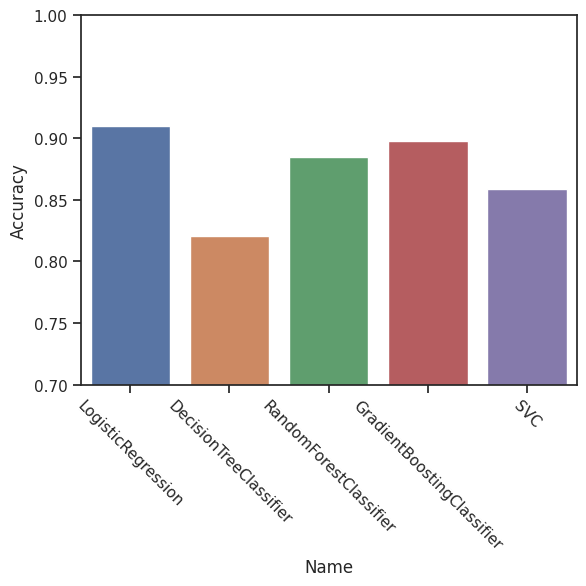

In [25]:
sns.barplot(x=Model_Acc_List["Name"], y=Model_Acc_List["Accuracy"],data=Model_Acc_List)


plt.xticks(rotation=-45)
plt.ylim(0.7, 1)

# **Logistic Regression**

In [26]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)


# **Logistic Regression - Classification Report**

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9102564102564102

# **Gradient Boost**

In [28]:
from pandas.core.groupby.groupby import GroupByPlot
GB = GradientBoostingClassifier()

# Train the classifier on the training data
GB.fit(X_train, y_train)

# Make predictions on the test data
y_predi = GB.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_predi)
print("Accuracy:", accuracy)

Accuracy: 0.8974358974358975


# **Gradient Boost Classifier - Classification Report**

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_predi)
ac = accuracy_score(y_test,y_predi)
print(classification_report(y_test,y_predi))
print(ac)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.88      0.98      0.93        53

    accuracy                           0.90        78
   macro avg       0.91      0.85      0.87        78
weighted avg       0.90      0.90      0.89        78

0.8974358974358975
[[18  7]
 [ 1 52]]


# **Support Vector Machine**

In [30]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your feature data stored in 'X' and label data in 'y'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9358974358974359


# **Support Vector Machine - Classification Report**

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(ac)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.93      0.98      0.95        53

    accuracy                           0.94        78
   macro avg       0.94      0.91      0.92        78
weighted avg       0.94      0.94      0.93        78

0.9358974358974359
[[21  4]
 [ 1 52]]


<Axes: >

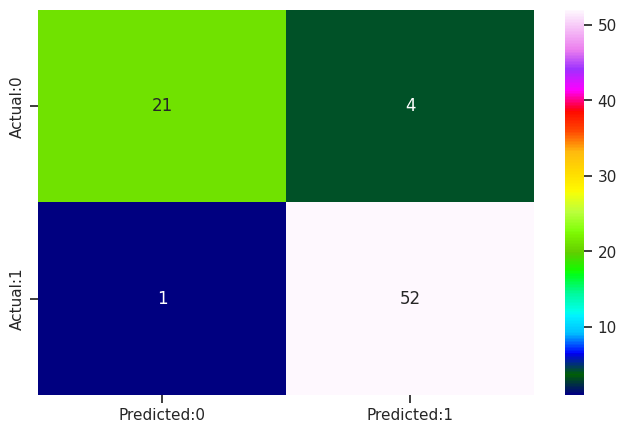

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='gist_ncar')

<Axes: >

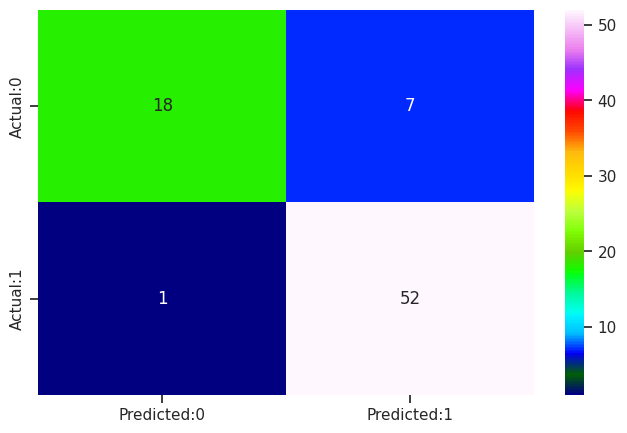

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predi)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='gist_ncar')